# Customer Churn Analysis

### Customer Churn prediction means to know which customers are likely to unsubscribe or leave the company's services, often since acquiring new customers is more difficult than retaining the existing customer base. In customer churn analysis with the help of a few input data we can predict if the customer is about to leave or exit the service and get in touch with that particular customer and get to know their expectations and try and reach it, thereby retaining the customer. This plays a very significant role in maintaining the business's revenue. In the current scenario, the churn prediction of bank customers is demonstrated.

# About Dataset

This data set contains details of a bank's customers and the target feature is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

Link: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling


## Features

### RowNumber:

Row Numbers from 1 to 10000.


### CustomerId:

Unique Ids for bank customer identification.


### Surname:

Customer's last name.


### CreditScore:

Credit score of the customer. 


### Geography:

The country to which the customer belongs.


### Gender:

The customer's Gender (Male or Female).

### Age:

Age of the customer.


### Tenure:

Number of years the customer has been with the bank.


### Balance:

Current Bank balance of the customer.


### NumOfProducts:

Number of bank products the customer is utilising.


### HasCrCard:

Whether the customer holds a credit card with the bank or not.


### IsActiveMember:

Whether the customer is an active member with the bank or not.


### EstimatedSalary:

Estimated salary of the customer in Dollars.


### Exited:

1 if the customer closed their account with the bank and 0 if the customer is retained.

In [1]:
# Importing required Libraries

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Loading the dataset

df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Columns present in the dataset

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
# Checking the first 10 rows

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
# Checking the last 10 rows

df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
# Checking the number of rows and columns.
print('Total number of observations/rows are:',df.shape[0])
print('Total number of features/columns are:',df.shape[1])

Total number of observations/rows are: 10000
Total number of features/columns are: 14


In [7]:
# Checking the basic info of the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Checking the data description of all the variables, which gives us the count, mean, std, minimum, 25th quartile, 
# median, 75th quartile and maximum values in the respective numerical columns.

df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00000,5000.50000,2886.89568,1.00000,2500.75000,5000.50000,7500.25000,10000.00000
CustomerId,10000.00000,15690940.56940,71936.18612,15565701.00000,15628528.25000,15690738.00000,15753233.75000,15815690.00000
CreditScore,10000.00000,650.52880,96.65330,350.00000,584.00000,652.00000,718.00000,850.00000
Age,10000.00000,38.92180,10.48781,18.00000,32.00000,37.00000,44.00000,92.00000
Tenure,10000.00000,5.01280,2.89217,0.00000,3.00000,5.00000,7.00000,10.00000
Balance,10000.00000,76485.88929,62397.40520,0.00000,0.00000,97198.54000,127644.24000,250898.09000
NumOfProducts,10000.00000,1.53020,0.58165,1.00000,1.00000,1.00000,2.00000,4.00000
HasCrCard,10000.00000,0.70550,0.45584,0.00000,0.00000,1.00000,1.00000,1.00000
IsActiveMember,10000.00000,0.51510,0.49980,0.00000,0.00000,1.00000,1.00000,1.00000
EstimatedSalary,10000.00000,100090.23988,57510.49282,11.58000,51002.11000,100193.91500,149388.24750,199992.48000


In [9]:
# Before proceeding let us drop those features which do not play a significant role in predicting whether the 
# customer will exit the bank or not, in this case: RowNumber, CustomerId, Surname.

df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [10]:
# Before Starting the Exploratory Data Analysis, Seeing how the data values look like for all the observations:

for i in df.drop(['Balance', 'EstimatedSalary'], axis = 1).columns:
    print('*'*50,i,'*'*50)
    print()
    print(set(df[i].to_list()))
    print()

************************************************** CreditScore **************************************************

{350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395, 399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567,

In [11]:
df.describe().corr().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.997923,0.997586,-0.284164,0.997557,0.997546,0.997546,-0.386757,0.997543
Age,0.997923,1.000000,0.999981,-0.320459,0.999978,0.999977,0.999977,-0.430048,0.999977
Tenure,0.997586,0.999981,1.000000,-0.325495,1.000000,1.000000,1.000000,-0.434772,1.000000
Balance,-0.284164,-0.320459,-0.325495,1.000000,-0.325988,-0.326152,-0.326151,0.947805,-0.326172
NumOfProducts,0.997557,0.999978,1.000000,-0.325988,1.000000,1.000000,1.000000,-0.435295,1.000000
HasCrCard,0.997546,0.999977,1.000000,-0.326152,1.000000,1.000000,1.000000,-0.435435,1.000000
IsActiveMember,0.997546,0.999977,1.000000,-0.326151,1.000000,1.000000,1.000000,-0.435437,1.000000
EstimatedSalary,-0.386757,-0.430048,-0.434772,0.947805,-0.435295,-0.435435,-0.435437,1.000000,-0.435472
Exited,0.997543,0.999977,1.000000,-0.326172,1.000000,1.000000,1.000000,-0.435472,1.000000


<Axes: >

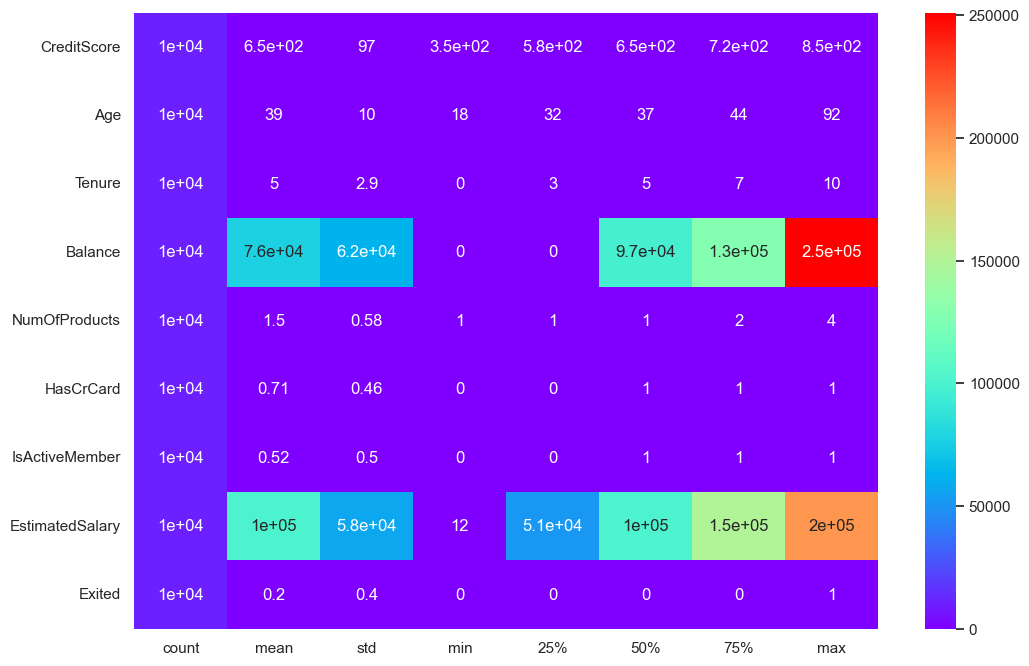

In [12]:
# Getting to know the distribution of each variable visually:

plt.figure(figsize=(12,8))
sns.heatmap(df.describe().T, cmap='rainbow', annot=True)

# Exploratory Data Analysis

## Univariate Analysis of the features

In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])

In [15]:
numeric_features.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
num_fts_1 = numeric_features[['CreditScore','Age','Balance', 'EstimatedSalary', 'Exited']]
num_fts_2 = numeric_features[['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

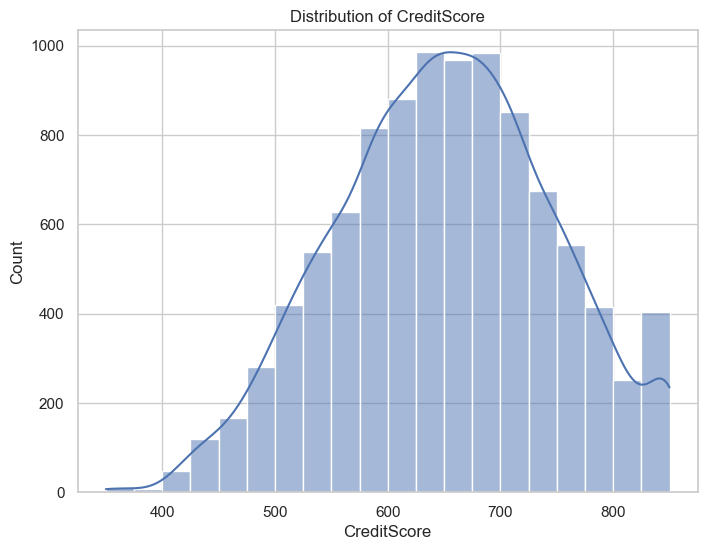

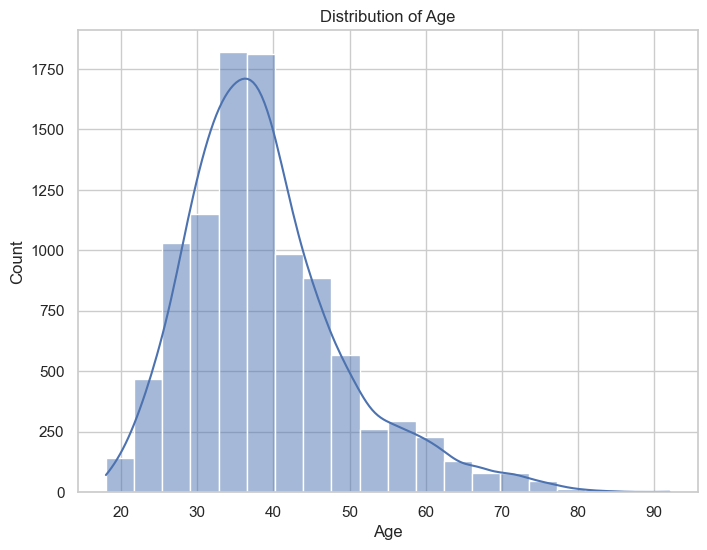

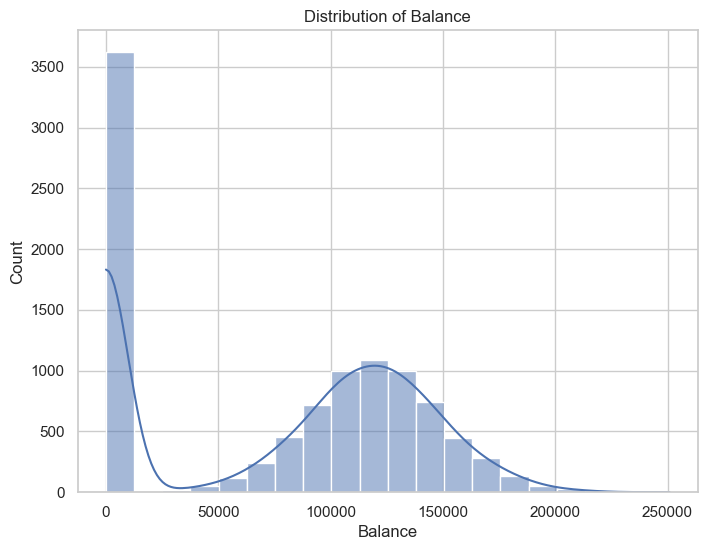

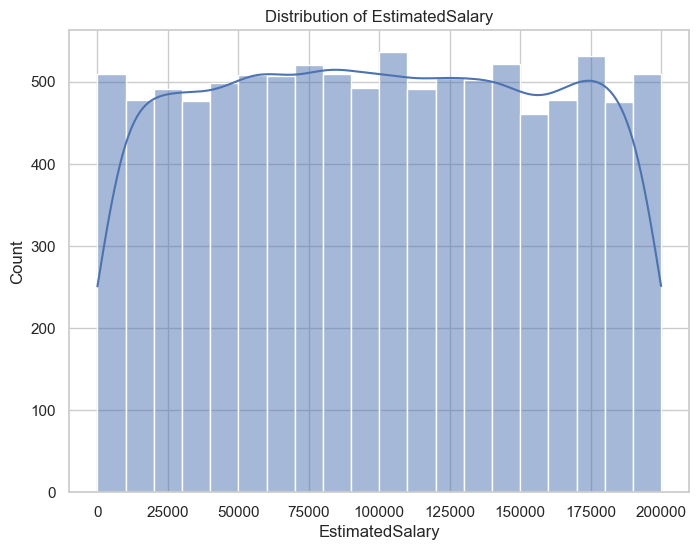

In [17]:
# Checking how the features are distributed

for i in num_fts_1.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.histplot(data=num_fts_1, x=i, bins=20, kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

It is observed that the credit score of the majority of the customers is between 600 and 730.

The majority of the customer age lies between 35 to 40 years.

More than 3000 customers have a balance of 0 with the bank, however the balance is normally distributed for balance greater than $0.

Estimated Salary of the customers vary from as low as 11.58 Dollars to as high as $200k distributed uniformly

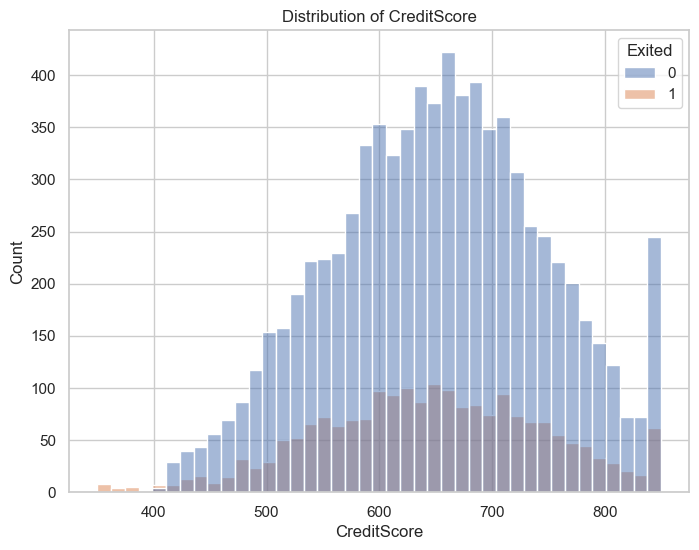

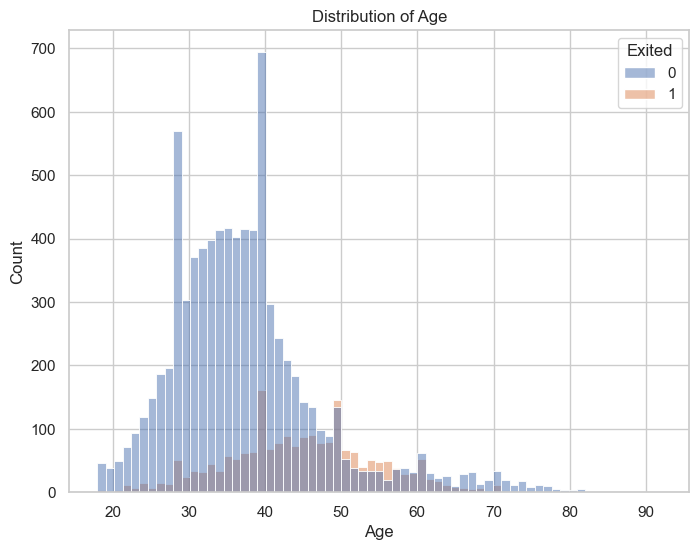

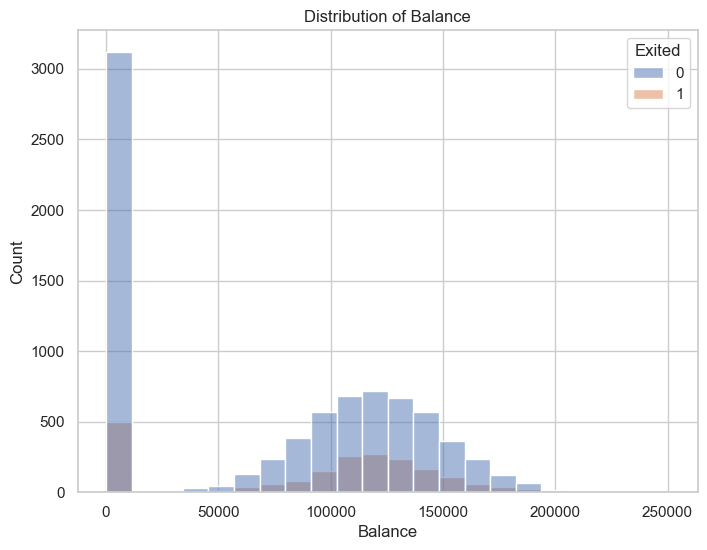

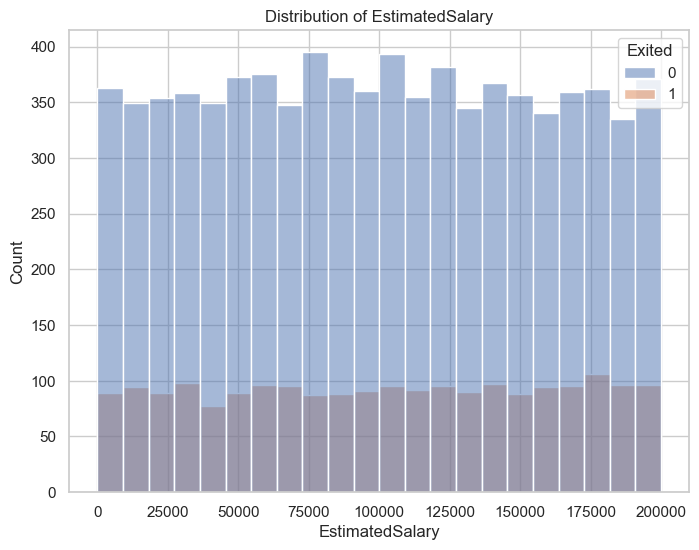

In [18]:
for i in num_fts_1.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.histplot(data=num_fts_1, x=i, hue='Exited')
    plt.title(f'Distribution of {i}')
    plt.show()

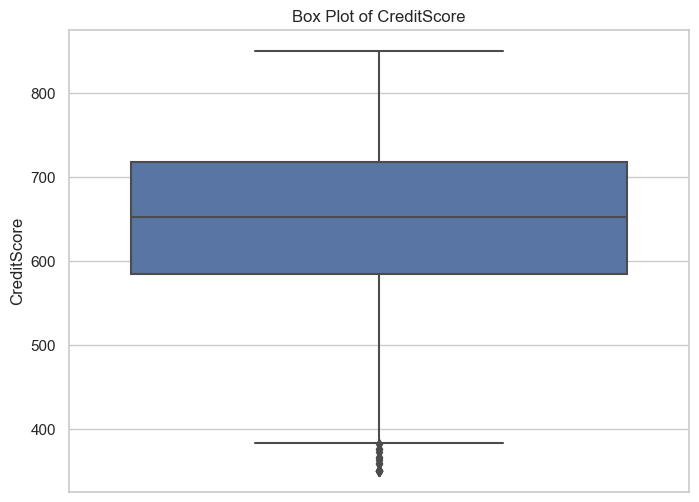

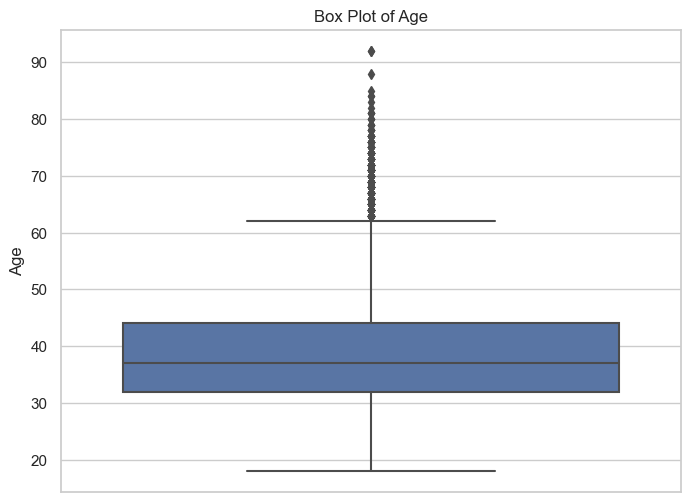

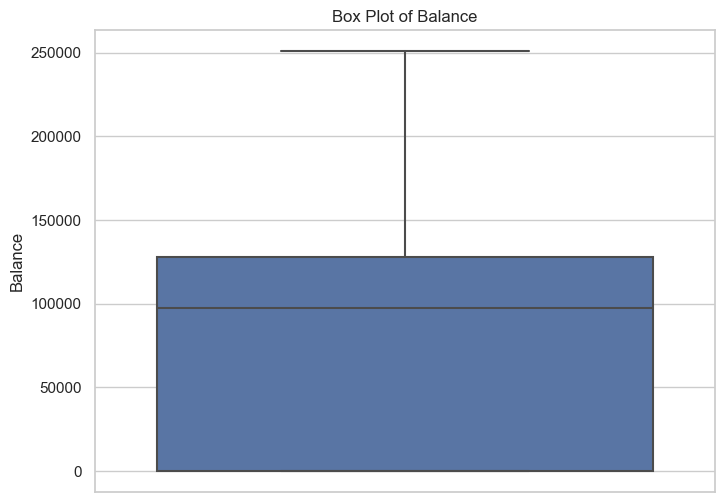

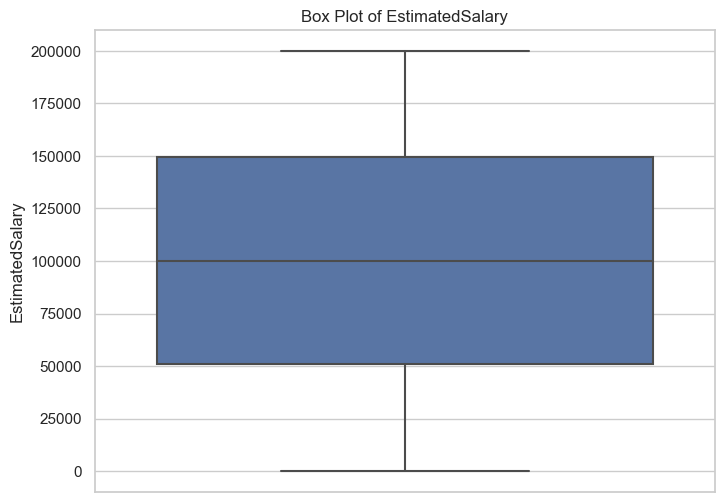

In [19]:
for i in num_fts_1.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=num_fts_1, y=i)
    plt.title(f'Box Plot of {i}')
    plt.show()

There are presence of outliers in the features CreditScore and Age.

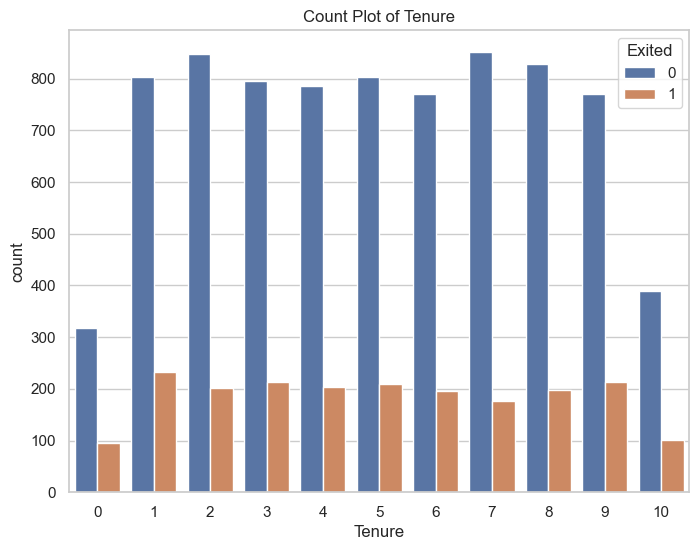

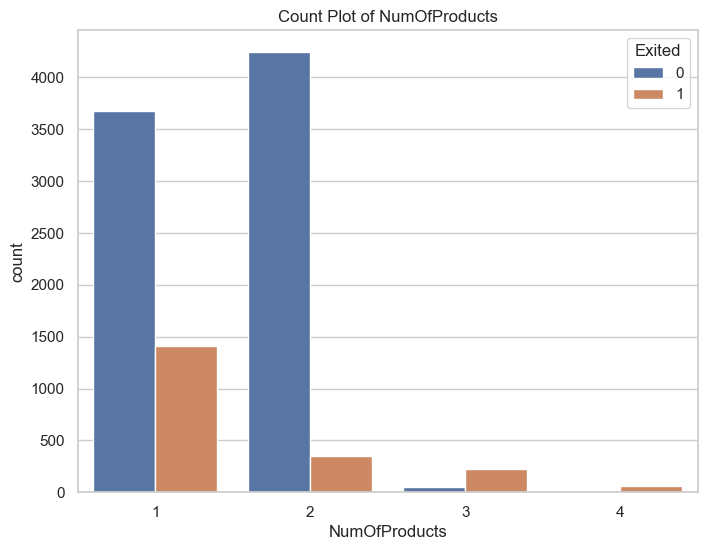

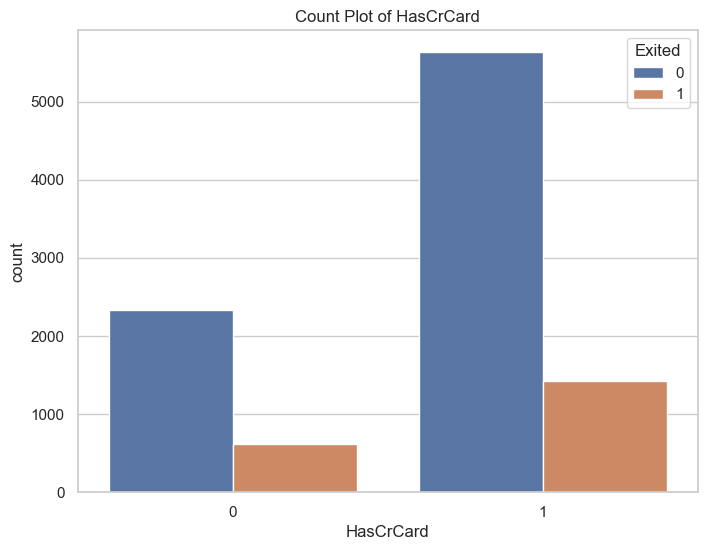

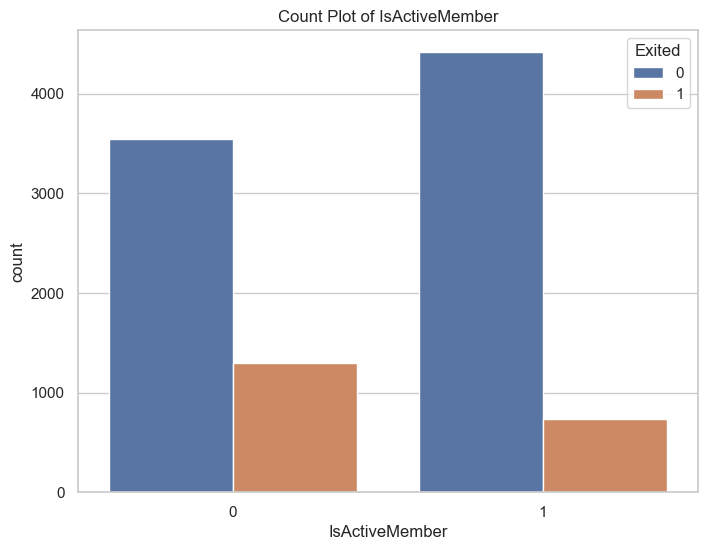

In [20]:
for i in num_fts_2.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.countplot(data=num_fts_1, x = num_fts_2[i], hue='Exited')
    plt.title(f'Count Plot of {i}')
    plt.show()

It can be observed that the customer having exited the bank is almost uniform as far as the tenure is considered.

It is also evident that most of the customers are using only either 1 or 2 products from the bank.

More than 7000 customers are using the credit card service from the bank and more than 5000 customers are active members.

In [21]:
df_cat = df[['Geography', 'Gender', 'Exited']]

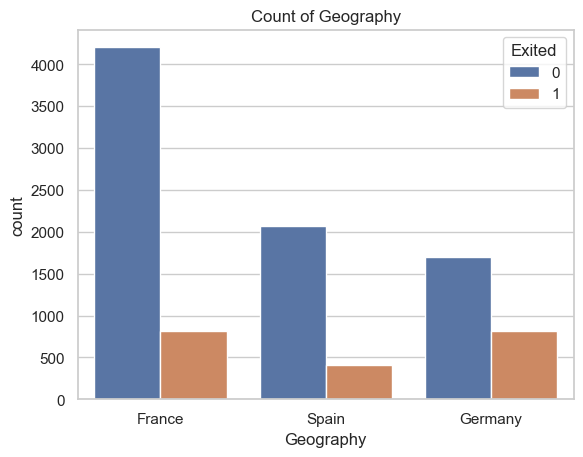

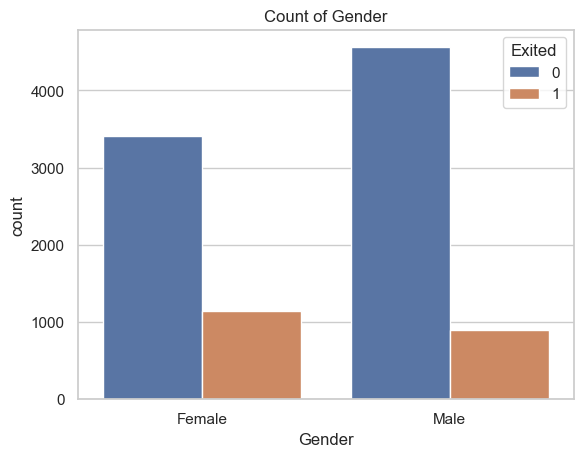

In [22]:
for i in df_cat.columns[:-1]:
    sns.countplot(data=df_cat, x = i, hue='Exited')
    plt.title(f'Count of {i}')
    plt.show()

The bank has majority of its customer base located at France with almost 5000 customers. It's German customer base is only 2509 and has the highest churn count of 814 compared to Spain and France.

Most of the bank's customers are males, however the females are tend to exit the bank more than males.

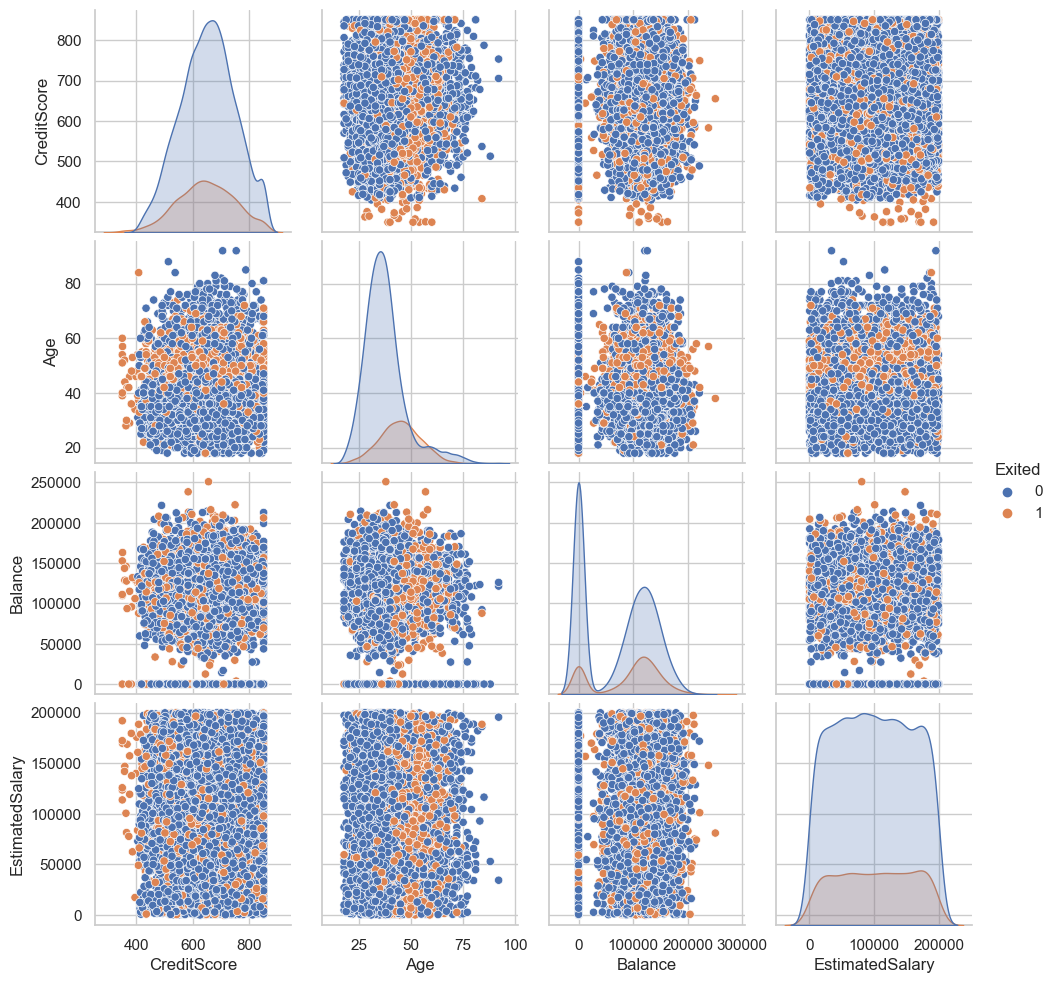

In [23]:
sns.pairplot(num_fts_1, hue='Exited')
plt.show()

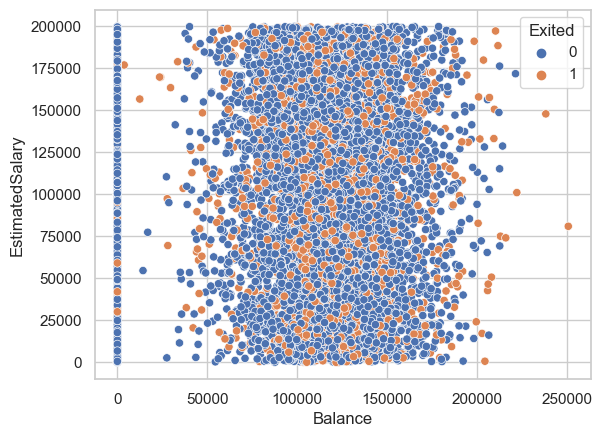

In [24]:
sns.scatterplot(data=num_fts_1, x='Balance', y = 'EstimatedSalary', hue='Exited')
plt.show()

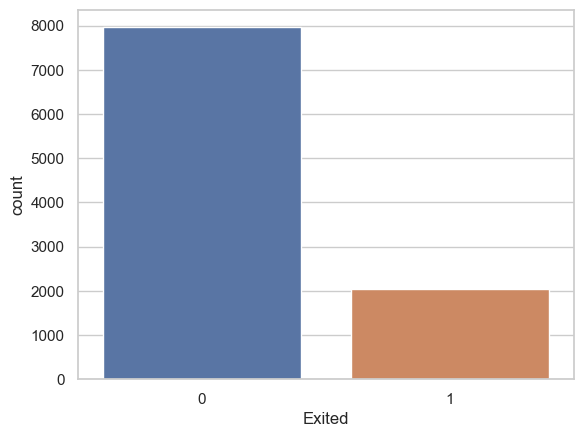

In [25]:
sns.countplot(data=df, x = 'Exited')
plt.show()

In [26]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

There are 7963 customers currently in the bank, and 2037 customers who have exited.

## Multivariate Analysis

In [27]:
# Checking the correlation matrix.

df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


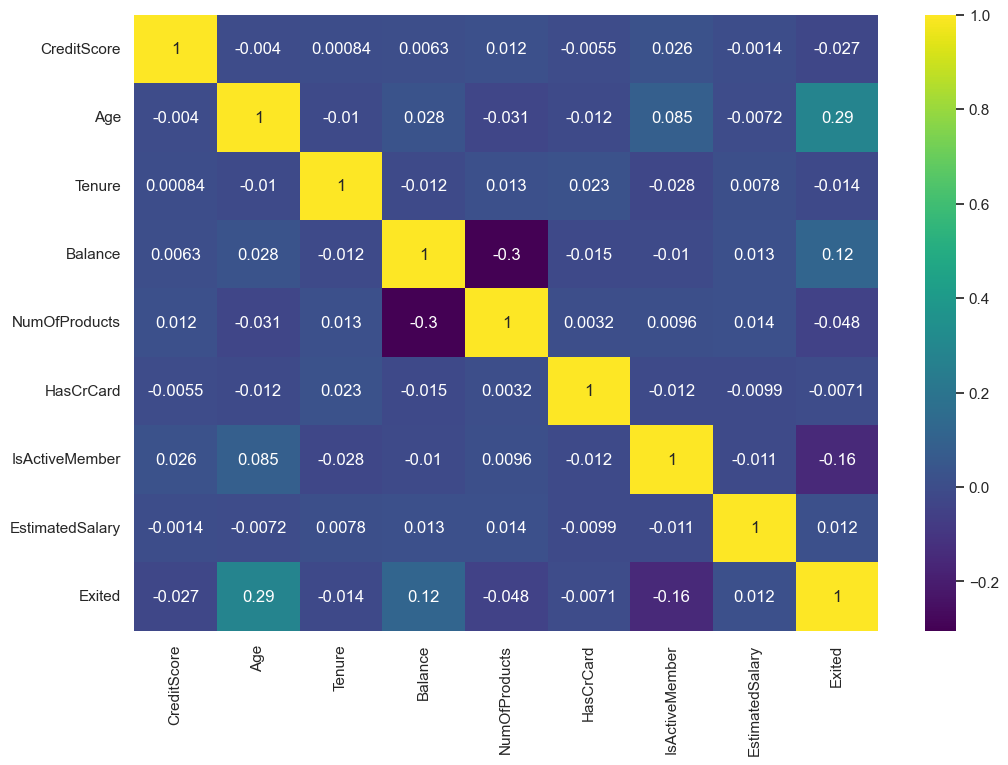

In [28]:
# The same can be visualised in the form of a heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.show()

# Data Preprocessing

## Handling missing values

In [29]:
# Checking what percent of values are missing in each feature.

pd.DataFrame((df.isnull().sum()/len(df))*100, columns=['Missing value %'], index = df.columns)

,Missing value %
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0
HasCrCard,0.0
IsActiveMember,0.0
EstimatedSalary,0.0


In [30]:
pd.DataFrame(df.dtypes, index=df.columns, columns=['Datatype'])

,Datatype
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


## Label Encoding

Features Geography and Gender are in Object datatype, for the machine learning model, we need to convert the same into numerical by using label encoding

In [31]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [32]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes

In [33]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

## One Hot Encoding

In [34]:
df = pd.get_dummies(data=df, columns=['Geography'], drop_first=True)

In [35]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [36]:
pd.DataFrame(df.dtypes, index=df.columns, columns=['Datatype'])

,Datatype
CreditScore,int64
Gender,int8
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


## Handling Outliers

Let's try and build the model without handling the outliers.

In [37]:
# Copying the dataset as df_model for further steps in order to retain the initial dataset features.

df_model = df.copy()

### Splitting the data into dependent variable y and independent variable x

In [38]:
x = df_model.drop('Exited', axis=1)
y = df_model['Exited']

# Imbalance Treatment of the Output variable

In [39]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### The data is evidently imbalanced, as the dataset has almost 80% of the values as not exited and 20% values as exited, now if the data is split by using train_test_split by giving test size as 25%, the test data will only receive negligible number of observations where the customers have exited, this makes the data bias towards the higher weighted class and this must be taken care of as our entire model is built on the pattern it gets trained on. Here, using over sampling approach to balance the classes

In [40]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler()
x_over, y_over = over_sampler.fit_resample(x,y)

In [41]:
y_over.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Now the data has equal number of observations with each class.

### Splitting the data into train and test samples

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over, test_size=0.25, random_state=42)

## Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc_train = scaler.fit_transform(x_train)
x_sc_test = scaler.fit_transform(x_test)

Scaling the data after using train-test split is essential to prevent data leakage and ensure that the model is trained and evaluated properly. Here's a brief explanation of the concept of data leakage:

**Data Leakage:**
- Data leakage occurs when information from the test or validation dataset unintentionally influences the training of a machine learning model.
- It leads to overly optimistic performance estimates during model evaluation and can result in a model that performs poorly on new, unseen data.

**Why Scale Data After Train-Test Split:**
- When you perform train-test split, you are dividing your dataset into two parts: one for training the model and one for evaluating its performance.
- Scaling (standardizing or normalizing) the data should be part of the preprocessing applied only to the training data.
- The reason for this is to mimic real-world scenarios where the model is trained on historical data without any knowledge of the future (test data).
- If you scale the entire dataset before splitting, information from the test set (e.g., mean, standard deviation) can influence the scaling of the training set, leading to data leakage.

In summary, scaling data after train-test split helps ensure that the model is trained on independent information and that the evaluation accurately reflects its generalization performance on new, unseen data. This practice is crucial for maintaining the integrity of the model evaluation process and avoiding data leakage.

In [45]:
# Importing necessary models from sklearn for model building:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


# Importing performance metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

In [46]:
# Building Binary classification Logistic regression model.

logit = LogisticRegression()
logit.fit(x_sc_train, y_train)
logit_pred_train = logit.predict(x_sc_train)
logit_pred_test = logit.predict(x_sc_test)

In [47]:
print("Train Classification report and confusion matrix for Logit model:")
print('\n')
print(classification_report(y_train, logit_pred_train))
print(confusion_matrix(y_train, logit_pred_train))
print('\n')
print("Train accuracy score:", accuracy_score(y_train, logit_pred_train))

Train Classification report and confusion matrix for Logit model:


              precision    recall  f1-score   support

           0       0.70      0.71      0.71      5927
           1       0.71      0.70      0.71      6017

    accuracy                           0.71     11944
   macro avg       0.71      0.71      0.71     11944
weighted avg       0.71      0.71      0.71     11944

[[4227 1700]
 [1798 4219]]


Train accuracy score: 0.7071332886805091


In [48]:
print("Test Classification report and confusion matrix for Logit model:")
print('\n')
print(classification_report(y_test, logit_pred_test))
print(confusion_matrix(y_test, logit_pred_test))
print('\n')
print("Test accuracy score:", accuracy_score(y_test, logit_pred_test))

Test Classification report and confusion matrix for Logit model:


              precision    recall  f1-score   support

           0       0.71      0.70      0.71      2036
           1       0.69      0.70      0.70      1946

    accuracy                           0.70      3982
   macro avg       0.70      0.70      0.70      3982
weighted avg       0.70      0.70      0.70      3982

[[1435  601]
 [ 587 1359]]


Test accuracy score: 0.7016574585635359


The logistic regression is not giving satisfactory levels of accuracy, hence trying with other ML algorithms

In [49]:
# Building Random Forest Classifier model:

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_sc_train, y_train)
rfc_pred_train = rfc.predict(x_sc_train)
rfc_pred_test = rfc.predict(x_sc_test)

In [50]:
print("Train Classification report and confusion matrix for Random Forest Classifier model:")
print('\n')
print(classification_report(y_train, rfc_pred_train))
print(confusion_matrix(y_train, rfc_pred_train))
print('\n')
print("Train accuracy score:", accuracy_score(y_train, rfc_pred_train))

Train Classification report and confusion matrix for Random Forest Classifier model:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5927
           1       1.00      1.00      1.00      6017

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944

[[5927    0]
 [   0 6017]]


Train accuracy score: 1.0


In [51]:
print("Test Classification report and confusion matrix for Random Forest Classifier model:")
print('\n')
print(classification_report(y_test, rfc_pred_test))
print(confusion_matrix(y_test, rfc_pred_test))
print('\n')
print("Test accuracy score:", accuracy_score(y_test, rfc_pred_test))
print('\n')
print("Test recall score:", recall_score(y_test, rfc_pred_test))

Test Classification report and confusion matrix for Random Forest Classifier model:


              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2036
           1       0.91      0.98      0.94      1946

    accuracy                           0.94      3982
   macro avg       0.95      0.94      0.94      3982
weighted avg       0.95      0.94      0.94      3982

[[1843  193]
 [  31 1915]]


Test accuracy score: 0.9437468608739327


Test recall score: 0.9840698869475848


In [52]:
train_accuracy_rfc = cross_val_score(estimator=rfc, X=x_sc_train, y=y_train, cv=10, scoring='accuracy')
test_accuracy_rfc = cross_val_score(estimator=rfc, X=x_sc_test, y=y_test, cv=10, scoring='accuracy')
print(np.mean(train_accuracy_rfc))
print(np.mean(test_accuracy_rfc))

0.9414774009517602
0.8490648732383723


In [53]:
# Building Bagging Classifier model:

bcm = BaggingClassifier()
bcm.fit(x_sc_train, y_train)
bcm_pred_train = bcm.predict(x_sc_train)
bcm_pred_test = bcm.predict(x_sc_test)

In [54]:
print("Train Classification report and confusion matrix for Bagging Classifier model:")
print('\n')
print(classification_report(y_train, bcm_pred_train))
print(confusion_matrix(y_train, bcm_pred_train))
print('\n')
print("Train accuracy score:", accuracy_score(y_train, bcm_pred_train))

Train Classification report and confusion matrix for Bagging Classifier model:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5927
           1       1.00      1.00      1.00      6017

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944

[[5907   20]
 [  15 6002]]


Train accuracy score: 0.9970696584058941


In [55]:
print("Test Classification report and confusion matrix for Bagging Classifier model:")
print('\n')
print(classification_report(y_test, bcm_pred_test))
print(confusion_matrix(y_test, bcm_pred_test))
print('\n')
print("Test accuracy score:", accuracy_score(y_test, bcm_pred_test))

Test Classification report and confusion matrix for Bagging Classifier model:


              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2036
           1       0.89      0.96      0.92      1946

    accuracy                           0.92      3982
   macro avg       0.92      0.92      0.92      3982
weighted avg       0.92      0.92      0.92      3982

[[1802  234]
 [  87 1859]]


Test accuracy score: 0.9193872425916625


In [56]:
train_accuracy_bcm = cross_val_score(estimator=bcm, X=x_sc_train, y=y_train, cv=10, scoring='accuracy')
test_accuracy_bcm = cross_val_score(estimator=bcm, X=x_sc_test, y=y_test, cv=10, scoring='accuracy')
print(np.mean(train_accuracy_bcm))
print(np.mean(test_accuracy_bcm))

0.9254866382119804
0.8274675381922142


In [57]:
# Checking performance of the model using ROC-AUC Curve

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [59]:
logit_roc_under_auc = roc_auc_score(y_test,rfc_pred_test)

In [60]:
logit_roc_under_auc

0.9446380868922599

In [61]:
fpr, tpr, thres = roc_curve(y_test, rfc_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thres[:10])

array([0.        , 0.09479371, 1.        ])

array([0.        , 0.98406989, 1.        ])

array([inf,  1.,  0.])

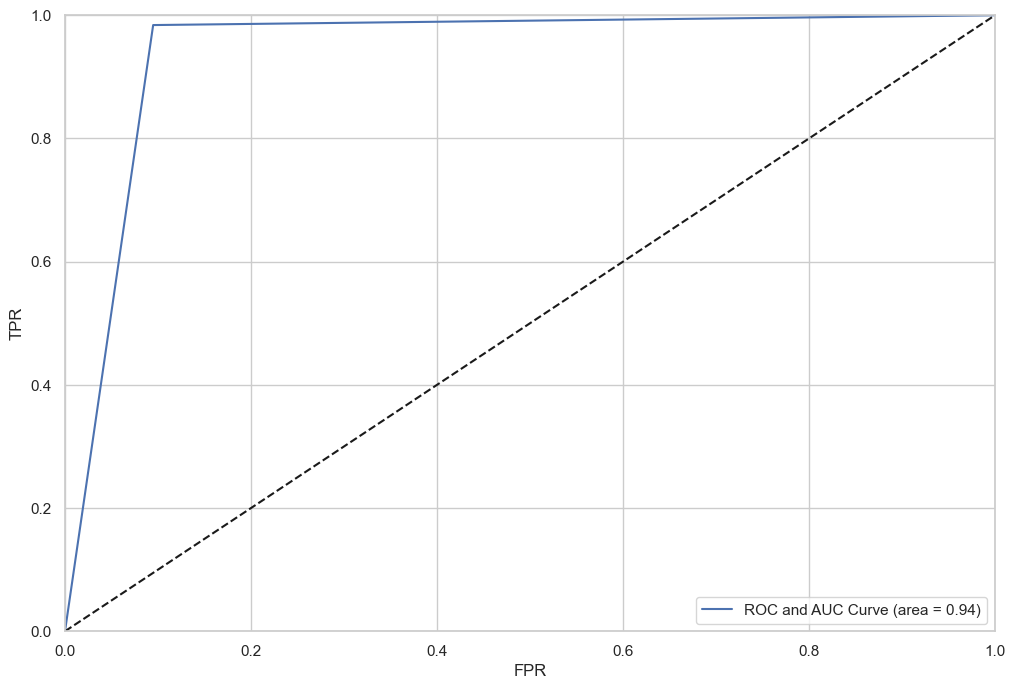

In [62]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve (area = %0.2f)' % logit_roc_under_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc='lower right')
plt.show()

## Concluding: Since the model is showing excellent performance in the ROC-AUC Curve, the model using Random Forest with Train accuracy of 100% and Test accuracy of 95% and Cross Validation mean Accuracy scores for training and test data is 94% and 85% respectively, Hence the model can be said, to be performing very well and can be used for deployment in production.

### Note: Since this is a Churn prediction model, the False Negative value should be as low as possible as we would not want to risk losing even a single customer, i.e if the model predicts the customer is not going to exit the bank wrongly, then no action will be taken as per the model's prediction and the bank might end up losing that particular customer. Recall values should be as high as possible, in this case it is  98% which makes the model extremely reliable and promising.

# Working Model Predictions

In [63]:
# Model Predictions using random feature values:

def pred_churn(CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember,EstimatedSalary,
             Geography_Germany, Geography_Spain):
    prediction = rfc.predict(scaler.transform([[CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, 
                                                IsActiveMember,EstimatedSalary, Geography_Germany, Geography_Spain]]))
    if prediction == [1]:
        print('\n')
        return 'The Bank is at high risk of losing this customer'
    else:
        print('\n')
        return 'The Bank is at a very low risk of losing this customer'

In [64]:
# Model taking input from user:

CreditScore = int(input("Enter the Credit Score of the customer: "))
Gender = int(input("Enter the Gender of the customer 1 if male 0 if female: "))
Age = int(input("Enter the age of the customer: "))
Tenure = int(input("Enter in number of years the customer has been associated with the Bank: "))
Balance = float(input("Enter current balance of the customer: "))
NumOfProducts = int(input("Enter the number of the Bank's products the customer is using: "))
HasCrCard = int(input("Enter if the customer holds a credit card provided by the Bank, 1 if yes 0 if no: "))
IsActiveMember = int(input("Enter if the customer is an active member with the Bank, 1 if yes 0 if no: "))
EstimatedSalary = float(input("Enter estimated salary of the customer: "))
Geography_Germany = int(input("Enter if the customer is based in Germany, 1 if yes 0 if no: "))
Geography_Spain = int(input("Enter if the customer is based in Spain, 1 if yes 0 if no: "))

print(pred_churn(CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember,EstimatedSalary,
             Geography_Germany, Geography_Spain))

Enter the Credit Score of the customer: 515
Enter the Gender of the customer 1 if male 0 if female: 0
Enter the age of the customer: 68
Enter in number of years the customer has been associated with the Bank: 5
Enter current balance of the customer: 0
Enter the number of the Bank's products the customer is using: 2
Enter if the customer holds a credit card provided by the Bank, 1 if yes 0 if no: 0
Enter if the customer is an active member with the Bank, 1 if yes 0 if no: 0
Enter estimated salary of the customer: 1643.8
Enter if the customer is based in Germany, 1 if yes 0 if no: 0
Enter if the customer is based in Spain, 1 if yes 0 if no: 1


The Bank is at high risk of losing this customer


In [65]:
# Model taking input from user:

CreditScore = int(input("Enter the Credit Score of the customer: "))
Gender = int(input("Enter the Gender of the customer 1 if male 0 if female: "))
Age = int(input("Enter the age of the customer: "))
Tenure = int(input("Enter in number of years the customer has been associated with the Bank: "))
Balance = float(input("Enter current balance of the customer: "))
NumOfProducts = int(input("Enter the number of the Bank's products the customer is using: "))
HasCrCard = int(input("Enter if the customer holds a credit card provided by the Bank, 1 if yes 0 if no: "))
IsActiveMember = int(input("Enter if the customer is an active member with the Bank, 1 if yes 0 if no: "))
EstimatedSalary = float(input("Enter estimated salary of the customer: "))
Geography_Germany = int(input("Enter if the customer is based in Germany, 1 if yes 0 if no: "))
Geography_Spain = int(input("Enter if the customer is based in Spain, 1 if yes 0 if no: "))

print(pred_churn(CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember,EstimatedSalary,
             Geography_Germany, Geography_Spain))

Enter the Credit Score of the customer: 740
Enter the Gender of the customer 1 if male 0 if female: 1
Enter the age of the customer: 48
Enter in number of years the customer has been associated with the Bank: 8
Enter current balance of the customer: 75000
Enter the number of the Bank's products the customer is using: 2
Enter if the customer holds a credit card provided by the Bank, 1 if yes 0 if no: 1
Enter if the customer is an active member with the Bank, 1 if yes 0 if no: 1
Enter estimated salary of the customer: 280565
Enter if the customer is based in Germany, 1 if yes 0 if no: 0
Enter if the customer is based in Spain, 1 if yes 0 if no: 0


The Bank is at a very low risk of losing this customer
